<a href="https://colab.research.google.com/github/Ayush-Kori/7-day-dp-workshop/blob/main/Conditional_Paramaterixe_Operations_for_gold_pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install predictnow
from predictnow.pdapi import PredictNowClient
import pandas as pd
api_key = "%KeyProvidedToEachOfOurSubscriber"
api_host = "http://12.34.567.890:1000"  # our SaaS server

In [6]:
username="helloworld"
email="helloWorld@youremail.com"
client= PredictNowClient(api_host, api_key)

In [10]:
#AYou eill need to edit this input dataset file path and labelname
file_path='my_amazing_features.xlsx'
labelname='Next_day_strategy_return'
import os

In [18]:
#FANTASTIC JOB! NOW YOUR PREDICTNOW.AI CLIENT HAS BEEN SETUP
# For classification problems
#params = {'timeseries': 'yes', 'type': 'classification', 'feature_selection': 'shap', 'analysis': 'none', 'boost': 'gbdt', 'testsize': '0.2', 'weights': 'no', 'eda': 'yes', 'prob_calib': 'no', 'mode': 'train'}
#For regression provlem , suitable for CPO
params = {'timeseries': 'yes', 'type': 'regression',
'feature_selection': 'none', 'analysis': 'none',
'boost': 'gbdt', 'testsize': '0.2', 'weights': 'no',
'eda': 'yes', 'prob_calib': 'no', 'mode': 'train'}

In [ ]:
#Lets Create the model by sending the parameters to predictnow.ai
response = client.create_model(
 username=username, # only letters, numbers, or underscores
    model_name="test1",
    params=params,
 )

In [ ]:
#Lets load up the fiel to pandas in the local enviornment
from pandas import read_excel  # if you have excel imprt the the read_excel
df = read_excel(file_path, engine='openpyxl') # Same here
df.name = "testdataframe" #Optional but recommended
response = client.train (
    model_name="test1",
    input_df=df,
    label=labelname,
    username=username,
    email=email,
    return_output=False,
)

In [ ]:
print("FANTASTIC! YOUR FIRST-EVER MODEL TRAINING AT PREDICTNOW>AI HAS BEEN  COMLPLETED")
print(response)
# User now examine the train/test sets results from the model
# by calling the getresult function (and providing the name of the model that resides on predictnow.ai server)


In [ ]:
status = client.getstatus(username=username, train_id=response['train_id'])
if status["state"] == "COMPLETED":
  response = client.getresult(
      model_name="test1",
      username=username,
  )
  import pandas as pd
  predicted_targets_cv = pd.read_json(response.predicted_targets_cv)
  print("predicted_targets_cv")
  print(predicted_targets_cv)
  predicted_targets_test = pd.read_json(response.predicted_targets_test)
  performance_metrics = pd.read_json(response.predicted_targets_test)
  print("predicted_targets_test")
  print(predicted_targets_test)
  performance_metrics = pd.read_json(response.performance_metrics)
  print("performance_metrics")
  print(performance_metrics)
  # Now we can make LIVE prediction for many combinations of the parmaerets by populating
  #ros in the example_input_live.csv file with these parameter combinations



In [ ]:
if status["state"] == "COMPLETED"
   df = read_csv("example_input_live.csv") # Input data for live predicction
   df.name = "myfirstpredictname" # oprtinal but recommended
   # Making live predictions
   response = client.predict(
       model_name="test1",
       input_df=df,
       username=username,
       eda="yes",
       prob_calib=params["prob_calib"],
   )
   # FOR LIVE PREDICTION: (remmber lalbels and probaibilitites each
   # can have many rows corrsponding to many combiantions of parameters )
   y_pred = pd.read_json(response_labels)
   print("THE LABELS")
   print(labels)

In [ ]:
input_features = df['Date'.values]
for i in range(len(input_features)):
  #/ split y_pred['Date] into actual date and parameters string
  date_params = input_features[i].split(' ')
  params = date_params[i]
  if i==0:
  # initializing max_index and its parameters value
    # eg  (2.5 , 60, 0.2)
    params_cond_optimized = params
    y_pred_max =y_pred[i].values
  else:
    if y_pred[i].values >= y_pred_max:
      #updating max_index and it parameters value
      params_cond_optimized = params
      y_pred_max = y_pred[i].values
#params_cond_optimized is "conditionally optimal paramets for the next day"

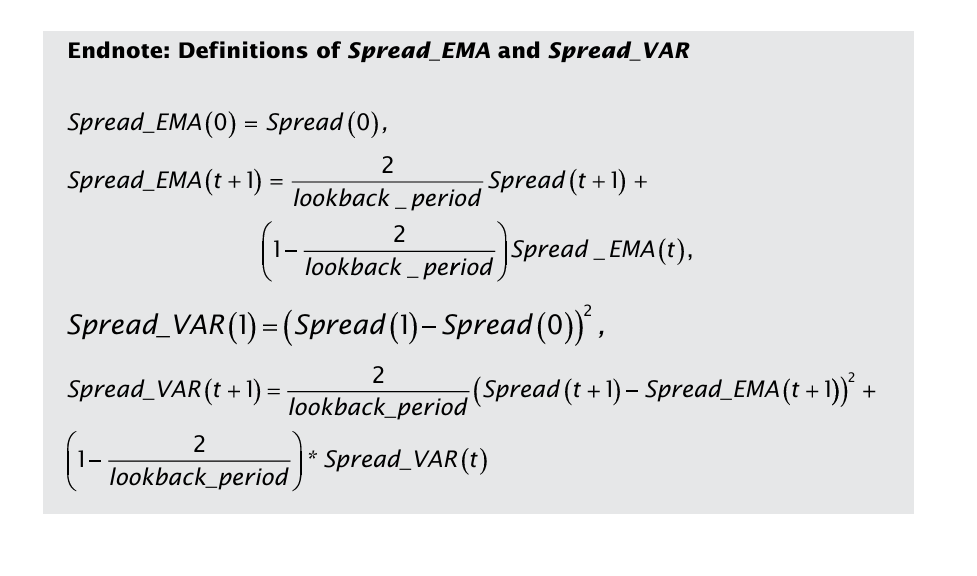